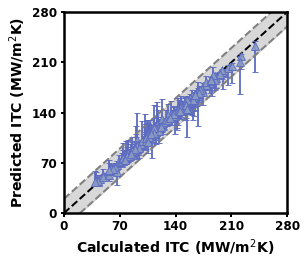

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '2_10colKfold_prediresults.csv'
data = pd.read_csv(file_path, index_col='SAMindex')

true_values = data['True_Values']
predictions = data.loc[:, 'Fold1_Predictions':'Fold10_Predictions']

mean_values = predictions.mean(axis=1)
max_values = predictions.max(axis=1)
min_values = predictions.min(axis=1)

error_upper = max_values - mean_values
error_lower = mean_values - min_values

plt.figure(figsize=(4, 3.7))

plt.fill_betweenx(
    y=np.linspace(0, 280, 100),  
    x1=np.linspace(0, 280, 100) - 20, 
    x2=np.linspace(0, 280, 100) + 20, 
    color='gray', alpha=0.3, label='Error ±20' 
)

plt.plot([0, 280], [0 , 280], '--', color='black', linewidth=2)
plt.plot([0, 280], [0 + 20, 280 + 20], '--', color='gray', linewidth=2)
plt.plot([0, 280], [0 - 20, 280 - 20], '--', color='gray', linewidth=2)

plt.xlabel(r'Calculated ITC (MW/m$^2$K)', fontsize=14, fontweight='bold')
plt.ylabel(r'Predicted ITC (MW/m$^2$K)', fontsize=14, fontweight='bold')

plt.xlim(0, 280)  
plt.ylim(0, 280)  


plt.errorbar(
    true_values, 
    mean_values, 
    yerr=[error_lower, error_upper], 
    fmt='^',            
    label='Mean Predictions with Error Bars', 
    color='#5C6BC0', 
    markerfacecolor='#8B9DC3',
    alpha=0.9,
    markersize=8,
    capsize=3,
    linewidth=2
)

plt.gca().spines['top'].set_linewidth(2.5)
plt.gca().spines['right'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
plt.gca().spines['left'].set_linewidth(2.5)

plt.tick_params(axis='both', which='major', width=2) 

plt.xticks(ticks=[0, 70, 140, 210, 280], fontsize=12, fontweight='bold')
plt.yticks(ticks=[0, 70, 140, 210, 280], fontsize=12, fontweight='bold')

plt.savefig('GBR_itc.jpg', dpi=1000, bbox_inches='tight', pad_inches=0.1)
plt.show()
